In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import integrate, optimize
from scipy.stats import poisson
from scipy.integrate import odeint, solve_ivp

plt.style.use('fivethirtyeight')

In [3]:
country_list = [
 
#  'Thailand',
 'Japan',
#  'Singapore',
#  'Nepal',
#  'Malaysia',
#  'Canada',
#  'Australia',
#  'Cambodia',
#  'Sri Lanka',
 'Germany',
#  'Finland',
#  'United Arab Emirates',
#  'Philippines',
#  'India',
 'Italy',
#  'Sweden',
 'Spain',
#  'Belgium',
#  'Egypt',
#  'Lebanon',
#  'Iraq',
#  'Oman',
#  'Afghanistan',
#  'Bahrain',
#  'Kuwait',
#  'Algeria',
#  'Croatia',
#  'Switzerland',
#  'Austria',
#  'Israel',
#  'Pakistan',
#  'Brazil',
#  'Georgia',
#  'Greece',
#  'North Macedonia',
#  'Norway',
#  'Romania',
#  'Estonia',
#  'Netherlands',
#  'San Marino',
#  'Belarus',
#  'Iceland',
#  'Lithuania',
#  'Mexico',
#  'New Zealand',
#  'Nigeria',
#  'Australia',
#  'Ireland',
#  'Luxembourg',
#  'Monaco',
#  'Qatar',
#  'Ecuador',
#  'Azerbaijan',
#  'Armenia',
#  'Dominican Republic',
#  'Indonesia',
#  'Portugal',
#  'Andorra',
#  'Australia',
#  'Latvia',
#  'Morocco',
#  'Saudi Arabia',
#  'Senegal',
#  'Argentina',
#  'Chile',
#  'Jordan',
#  'Ukraine',
#  'Hungary',
#  'Australia',
#  'Liechtenstein',
 'Poland',
#  'Tunisia',
#  'Bosnia and Herzegovina',
#  'Slovenia',
#  'South Africa',
#  'Bhutan',
#  'Cameroon',
#  'Colombia',
#  'Costa Rica',
#  'Peru',
#  'Serbia',
#  'Slovakia',
#  'Togo',
#  'French Guiana',
#  'Malta',
#  'Martinique',
#  'Bulgaria',
#  'Maldives',
#  'Bangladesh',
#  'Paraguay',
#  'Canada',
#  'Albania',
#  'Cyprus',
#  'Brunei',
#  'Burkina Faso',
#  'Holy See',
#  'Mongolia',
#  'Panama',
#  'China',
#  'Iran',
#  'Korea, South',
#  'France',
#  'Cruise Ship',
#  'United Kingdom',
#  'Denmark',
#  'Czechia',
#  'Taiwan*',
#  'Vietnam',
#  'Russia',
#  'Moldova',
#  'Bolivia',
#  'Denmark',
#  'France',
#  'Honduras',
#  'United Kingdom',
#  'Canada',
#  'Congo (Kinshasa)',
#  "Cote d'Ivoire",
#  'France',
#  'Jamaica',
#  'Reunion',
#  'Turkey',
#  'United Kingdom',
#  'US',
#  'Cuba',
#  'Guyana'

]

In [4]:
cured = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv')
deceased = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv")
infected = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')

In [5]:
def df_prep(df):   
    df = df.T
    df = df.rename(columns=df.iloc[1])
    df = df[country_list]
    df = df.drop(df.index[:4])
    df = df.groupby(df.columns, axis=1).sum()
    df.index = pd.to_datetime(df.index)
    return df

In [6]:
cured_updated = df_prep(cured)
deceased_updated = df_prep(deceased)
infected_updated = df_prep(infected)

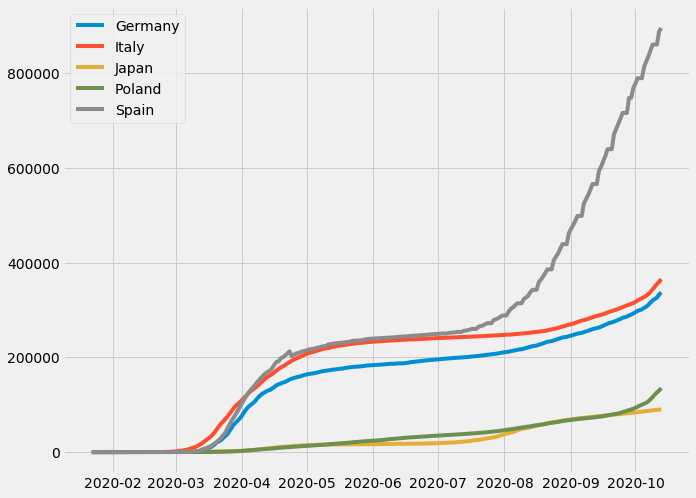

In [7]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(infected_updated)
plt.legend(infected_updated.columns)

# VAR

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from timeit import default_timer as timer

In [9]:
df_fit = infected_updated
model = VAR(df_fit)
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 14, Oct, 2020
Time:                     19:35:40
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    66.2933
Nobs:                     265.000    HQIC:                   66.0509
Log likelihood:          -10580.3    FPE:                4.11952e+28
AIC:                      65.8881    Det(Omega_mle):     3.68323e+28
--------------------------------------------------------------------
Results for equation Germany
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const            525.942275       169.194085            3.109           0.002
L1.Germany         0.859343         0.017644           48.703           0.000
L1.Italy           0.101247         0.013411            7.549         

In [10]:
forecast = results.forecast(results.y, steps=14)
forecast = forecast.astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [11]:
df_pred = pd.DataFrame(data=forecast, columns=df_fit.columns)

In [12]:
first_new_date = df_fit.index[-1] + datetime.timedelta(days=1)
# df_pred = df_pred.astype('int64').dtypes
df_pred = df_pred.set_index([pd.date_range(start=first_new_date, periods=len(df_pred.index), freq='D')])

In [13]:
df_fit = infected_updated
model = VAR(df_fit)
results = model.fit()
# results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [14]:
forecast = results.forecast(results.y, steps=14)
forecast = forecast.astype('int64')
df_pred = pd.DataFrame(data=forecast, columns=df_fit.columns)

In [15]:
first_new_date = df_fit.index[-1] + datetime.timedelta(days=1)
df_pred = df_pred.set_index([pd.date_range(start=first_new_date, periods=len(df_pred.index), freq='D')])
df_pred

,Germany,Italy,Japan,Poland,Spain
2020-10-14,339809,368049,90510,139280,904110
2020-10-15,342217,370514,90869,143445,911779
2020-10-16,344527,372850,91230,147777,919070
2020-10-17,346731,375045,91594,152281,925964
2020-10-18,348819,377087,91964,156962,932438
2020-10-19,350782,378964,92340,161824,938473
2020-10-20,352610,380662,92724,166872,944047
2020-10-21,354292,382170,93118,172112,949139
2020-10-22,355819,383473,93524,177548,953726
2020-10-23,357180,384558,93943,183185,957788


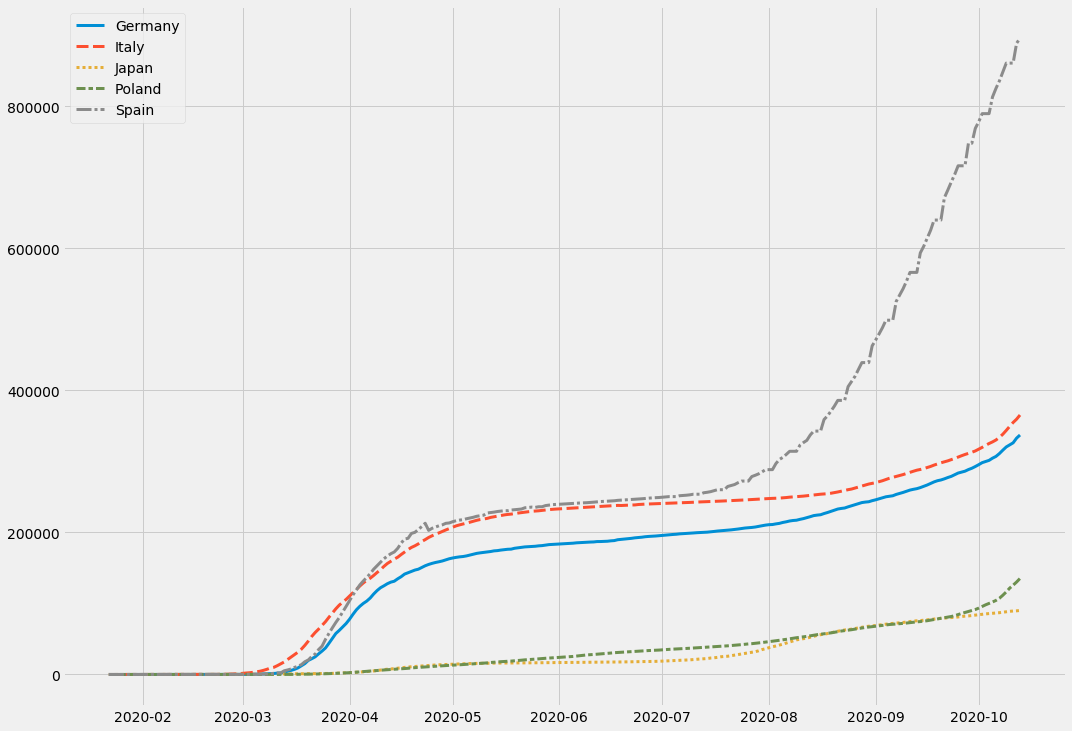

In [16]:
plt.figure(figsize=(16,12))
plt.grid(True)
sns.lineplot(data=infected_updated, linestyle='solid', linewidth=3)
# sns.lineplot(data=df_pred, linestyle='--', linewidth=3)
plt.legend(df_pred.columns)

# SIR with ABC

In [17]:
df_list = [infected_updated, cured_updated, deceased_updated]
target_country = 'Poland'

def format_for_seir(df_list):

    df_pruned_list = []
    for df in df_list:
        df = df[target_country]
    #     df = df.rename({target_country: df})
        df_pruned_list.append(df)
        merge = pd.concat(df_pruned_list, 1)
    
    return merge

df_seir = format_for_seir(df_list)
df_seir.columns = ['infected', 'cured', 'deceased']
df_seir = df_seir[df_seir['infected'] > 0]

df_seir = df_seir[:30]
df_seir = df_seir.reset_index(drop=True)
df_seir_list = df_seir.values.tolist()
df_seir_list

[[1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [5.0, 0.0, 0.0],
 [5.0, 0.0, 0.0],
 [11.0, 0.0, 0.0],
 [16.0, 0.0, 0.0],
 [22.0, 0.0, 0.0],
 [31.0, 0.0, 0.0],
 [49.0, 0.0, 1.0],
 [68.0, 0.0, 2.0],
 [103.0, 0.0, 3.0],
 [119.0, 0.0, 3.0],
 [177.0, 13.0, 4.0],
 [238.0, 13.0, 5.0],
 [251.0, 13.0, 5.0],
 [355.0, 1.0, 5.0],
 [425.0, 1.0, 5.0],
 [536.0, 1.0, 5.0],
 [634.0, 1.0, 7.0],
 [749.0, 1.0, 8.0],
 [901.0, 1.0, 10.0],
 [1051.0, 7.0, 14.0],
 [1221.0, 7.0, 16.0],
 [1389.0, 7.0, 16.0],
 [1638.0, 7.0, 18.0],
 [1862.0, 7.0, 22.0],
 [2055.0, 7.0, 31.0],
 [2311.0, 7.0, 33.0],
 [2554.0, 47.0, 43.0],
 [2946.0, 56.0, 57.0]]

In [20]:
def SIR_testmodel(y,t,beta,gamma):
    S, I, R = y
    
    dS_dt = -1*beta*I*S/N
    dI_dt = (beta*I*S/N) - gamma*I
    dR_dt = gamma*I
    
    return ([dS_dt, dI_dt, dR_dt])

#defining initial conditions

N = 38000000
S00 = 38000000
I00 = 0
R00 = 0
beta = 2.4
gamma = 0.4

t = np.arange(0,30)

S_star = float(poisson.pmf(1, 100))
beta_star = float(np.random.uniform(0, 3, 1))
gamma_star = float(np.random.uniform(0, 3, 1))


runs = 10
i = 0 
j = 0
epsilon = 5

res = []

while(i <= runs):
  
    S0_star = float(poisson.pmf(1, 100))
    beta_star = float(np.random.uniform(1, 3, 1))
    gamma_star = float(np.random.uniform(1, 2, 1))

    D_star = odeint(SIR_testmodel,[S00,I00,R00],t,args = (beta_star,gamma_star))

    distance = np.sqrt(sum((df_seir_list - D_star) ** 2))
    print(distance)

    if(distance[1] <= epsilon):
        res.append = [S0_star, beta_star, gamma_star, distance]
        i =+ 1
    else:
        pass
  
    j =+ 1
    acc_rate = i / j 
    print("current acceptance rate = ", acc_rate)

sol = odeint(SIR_testmodel,[S00,I00,R00],t,args = (beta,gamma))
sim = odeint(SIR_testmodel,[S00,I00,R00],t,args = (beta_star,gamma_star))
sol = np.array(sol)

plt.figure(figsize=(6,4))
plt.plot(t, sol[:,0],label = "S(t)")
plt.plot(t, sol[:,1],label = "I(t)")
plt.plot(t, sol[:,2],label = "R(t)")
plt.legend()
plt.show()

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptance rate =  0.0
[2.08130606e+08 7.87464285e+01 9.50841732e+01]
current acceptanc

KeyboardInterrupt: 

In [ ]:
N = 4000000
n_infected = 1
T_inc = 5.2  # average incubation period
T_inf = 2.9  # average infectious period
R_0 = 4  # reproduction number
days = 90


def epimodel(t, y, R_t, T_inf, T_inc):
    
    S, E, I, R = y
    
    dS_dt = -(R_t / T_inf) * I * S
    dE_dt = (R_t / T_inf) * I * S - (T_inc**-1) * E
    dI_dt = (T_inc**-1) * E - (T_inf**-1) * I
    dR_dt = (T_inf**-1) * I
    
    return ([dS_dt, dE_dt, dI_dt, dR_dt])



#defining initial conditions
initial_state = [(N - n_infected)/ N, 0, n_infected / N, 0]

# sol = odeint(epimodel,[S,E,I,R],t,args = (T_inc,T_inf))
sol = solve_ivp(epimodel, [0, days], initial_state, args=(R_0, T_inf, T_inc), t_eval=np.arange(days))

#plotting results
plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0],label = "S(t)")
plt.plot(sol.t, sol.y[1],label = "E(t)")
plt.plot(sol.t, sol.y[2],label = "I(t)")
plt.plot(sol.t, sol.y[3],label = "R(t)")
plt.legend()
plt.show()

In [ ]:
df_list = [infected_updated, cured_updated, deceased_updated]
target_country = 'Poland'

def format_for_seir(df_list):

    df_pruned_list = []
    for df in df_list:
        df = df[target_country]
    #     df = df.rename({target_country: df})
        df_pruned_list.append(df)
        merdz = pd.concat(df_pruned_list, 1)
    
    return merdz

df_seir = format_for_seir(df_list)
df_seir.columns = ['infected', 'cured', 'deceased']
df_seir = df_seir[df_seir['infected'] > 0]

df_seir = df_seir[:30]
df_seir = df_seir.reset_index(drop=True)
df_seir_list = df_seir.values.tolist()
df_seir_list